In [1]:
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# import package
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [10]:
num_classes = 10

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
                                                    'data/train',
                                                    target_size=(28, 28),
                                                    batch_size=16,
                                                    class_mode='categorical')

valid_generator = test_datagen.flow_from_directory(
                                                   'data/train',
                                                   target_size=(28, 28),
                                                   batch_size=16,
                                                   class_mode='categorical')

Found 70 images belonging to 10 classes.
Found 70 images belonging to 10 classes.


In [13]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [14]:
learning_rate = 0.0001
batch_size = 16 
epochs = 100

optimizer = keras.optimizers.Adam(lr=learning_rate)

inputs = Input(shape=(28, 28, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
outputs = Dense(num_classes, activation='softmax')(x)


model = Model(inputs=inputs, outputs=outputs)

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [16]:
model.fit_generator(train_generator,
                               steps_per_epoch=train_generator.n//batch_size,
                               epochs=epochs,
                               validation_data=valid_generator,verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 64ms/step - loss: 2.2988 - accuracy: 0.1875 - val_loss: 2.1568 - val_accuracy: 0.4000
Epoch 2/100
4/4 [==============================] - 0s 37ms/step - loss: 2.1052 - accuracy: 0.4259 - val_loss: 2.0366 - val_accuracy: 0.4000
Epoch 3/100
4/4 [==============================] - 0s 40ms/step - loss: 1.9770 - accuracy: 0.3906 - val_loss: 1.9026 - val_accuracy: 0.4000
Epoch 4/100
4/4 [==============================] - 0s 37ms/step - loss: 1.8234 - accuracy: 0.4074 - val_loss: 1.7460 - val_accuracy: 0.4000
Epoch 5/100
4/4 [==============================] - 0s 39ms/step - loss: 1.6375 - accuracy: 0.4259 - val_loss: 1.5678 - val_accuracy: 0.4000
Epoch 6/100
4/4 [==============================] - 0s 38ms/step - loss: 1.5378 - accuracy: 0.3889 - val_loss: 1.3740 - val_accuracy: 0.5429
Epoch 7/100
4/4 [==============================] - 0s 40ms/step - loss: 1.3018 - accuracy: 0.5312 - val_loss: 1.1579 - val_accuracy: 0.6571
Epoch 8/100
4/4 [===

In [17]:
model.save('./keras_model.h5')

預測結果= 5


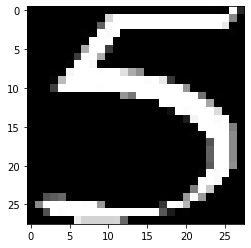

In [32]:
img=cv2.imread('3-6.png')
plt.imshow(img)
pre=model.predict(img.reshape(1,28,28,3))
y_pre = np.argmax(pre)
print("預測結果=",y_pre)